# **PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

# **1. Configuración del Ambiente**


---




In [50]:
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from joblib import load
global df_traffic, resultados, modelo, modelo_clasificacion

# **2. Preprocesamiento de Datos**


---


In [51]:
# Leemos archivo csv
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [52]:
# Crear los DataFrame con las columnas a tratar.
df_column =[df.device, df.geoNetwork, df.totals, df.trafficSource]

df_device = pd.DataFrame(df.device)
df_geoNetwork = pd.DataFrame(df.geoNetwork)
df_totals = pd.DataFrame(df.totals)
df_traffic_source = pd.DataFrame(df.trafficSource)





In [53]:
dfs = [df_device, df_geoNetwork, df_totals, df_traffic_source]
columns = ["device", "geoNetwork", "totals", "trafficSource"]

In [54]:
# Extrae las columnas ocultas de los 4 dataframes creando 4 dataframes nuevos en la lista df_flattens

j = 0
lista = []
df_flattens = []
for column in columns:
  lista = []
  df_tratar = dfs[j] # selecciona el data frame
  for i in range(len(dfs[j])):
    dato = df_tratar[column][i]
    dicc = json.loads(dato)
    lista.append(dicc)
  df_flatten = pd.DataFrame(lista)
  df_flattens.append(df_flatten)

  j += 1 # j = j + 1

df_flattens[3]

,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12278,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/pl/,NaN,NaN
12279,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/,NaN,NaN
12280,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/,NaN,NaN
12281,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,True,/yt/about/lt/,NaN,NaN


In [55]:
# Borramos las colunmas contenidas en la lista columns
df.drop(columns, axis = 1, inplace = True)

In [56]:
# Visualizamos el dataframe creado para borrar las columnas con valores unicos
df_flattens[1].head()

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [57]:
# # Metodo que comprueba las columnas con valors unicos len(df['columna'].unique()) se guardan dichas columnas en una lista

In [58]:
# Metodo que comprueba las columnas con valors unicos len(df['columna'].unique()) se guardan dichas columnas en una lista
df_columns = ["socialEngagementType"]

df_flattens_0_columns = ["browserVersion", 	"browserSize", 	"operatingSystemVersion", "mobileDeviceBranding", "mobileDeviceModel", "mobileInputSelector", "mobileDeviceInfo", "mobileDeviceMarketingName", "flashVersion", "language", "screenColors", "screenResolution"]

df_flattens_1_columns = ["cityId", "latitude", "longitude", "networkLocation"]

df_flattens_2_columns = ["visits"]

df_flattens_3_columns = ["keyword", "adwordsClickInfo", "isTrueDirect", "adContent", "campaignCode"]






In [59]:
len(df_flattens[1]['metro'].unique())

53

In [60]:
# Borrado de columnas con valores unicos
df.drop(df_columns, axis = 1, inplace = True)

In [61]:
df_flattens[0].drop(df_flattens_0_columns, axis = 1, inplace = True)

In [62]:
df_flattens[3]

,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12278,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/pl/,NaN,NaN
12279,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/,NaN,NaN
12280,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,NaN,/yt/about/,NaN,NaN
12281,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,True,/yt/about/lt/,NaN,NaN


In [63]:
df_flattens[1].drop(df_flattens_1_columns, axis = 1, inplace = True)

In [64]:
df_flattens[1]

,continent,subContinent,country,region,metro,city,networkDomain
0,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown
1,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl
2,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar
3,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net
...,...,...,...,...,...,...,...
12278,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown
12279,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de
12280,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set)
12281,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt


In [65]:
df_flattens[2].drop(df_flattens_2_columns, axis = 1, inplace = True)


In [66]:
df_flattens[3].drop(df_flattens_3_columns, axis = 1, inplace = True)

In [67]:
# Se juntan los DataFrames en 1 solo df_traffic
df_traffic = df.join(df_flattens[0])
df_traffic = df_traffic.join(df_flattens[1])
df_traffic = df_traffic.join(df_flattens[3])
df_traffic = df_traffic.join(df_flattens[2])

In [68]:
df_traffic.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,referralPath,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,NaN,5,4,NaN,1,NaN


In [69]:
# Eliminar duplicados
df_traffic.drop_duplicates()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,referralPath,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,NaN,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),youtube.com,referral,/yt/about/pl/,1,1,1,1,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,(not set),youtube.com,referral,/yt/about/,1,1,1,1,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,/yt/about/,1,1,1,1,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,mobile,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt,(not set),youtube.com,referral,/yt/about/lt/,2,2,NaN,NaN,NaN


In [70]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelGrouping     12283 non-null  object
 1   date                12283 non-null  object
 2   fullVisitorId       12283 non-null  object
 3   sessionId           12283 non-null  object
 4   visitId             12283 non-null  object
 5   visitNumber         12283 non-null  int64 
 6   visitStartTime      12283 non-null  int64 
 7   browser             12283 non-null  object
 8   operatingSystem     12283 non-null  object
 9   isMobile            12283 non-null  bool  
 10  deviceCategory      12283 non-null  object
 11  continent           12283 non-null  object
 12  subContinent        12283 non-null  object
 13  country             12283 non-null  object
 14  region              12283 non-null  object
 15  metro               12283 non-null  object
 16  city                12

In [71]:
# Exploramos las 27 columnas con el metodo value.counts()
for columna in df_traffic.columns:
  print("-" * 30)
  print(df_traffic[columna].value_counts())

------------------------------
channelGrouping
Organic Search    5155
Social            3052
Direct            2011
Referral          1438
Paid Search        310
Affiliates         236
Display             77
(Other)              4
Name: count, dtype: int64
------------------------------
date
20161004    70
20161117    69
20161129    67
20161116    67
20161130    65
            ..
20170507    12
20161224    12
20161225    11
20170430    10
20170618    10
Name: count, Length: 366, dtype: int64
------------------------------
fullVisitorId
603373162136570069     24
7660377708313228942    24
5310912563447452038    20
3290805371994597664    20
4376572204985925602    19
                       ..
7917907532901038094     1
8260329816412564664     1
4641112779476898481     1
8031235139952469596     1
2905034275926274980     1
Name: count, Length: 9997, dtype: int64
------------------------------
sessionId
0085919192619182437_1497163986    2
1336534355295742450_1500188299    2
3992336687808087085

In [72]:
# Reemplazamos los nulos en esas columnas por 0
df_traffic = df_traffic.fillna({"bounces": 0, 'newVisits': 0, 'transactionRevenue': 0})

In [73]:
# Reemplazar texto por numeros
cuant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']
for columna in cuant:
  df_traffic[columna] = pd.to_numeric(df_traffic[columna])

In [74]:
# Divide los valores de la columna transactionRevenue por 1000000  "Escalado"
df_traffic["transactionRevenue"] = df_traffic["transactionRevenue"] / 1000000

In [75]:
# Remplaza las variables fechas por numeros
# df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

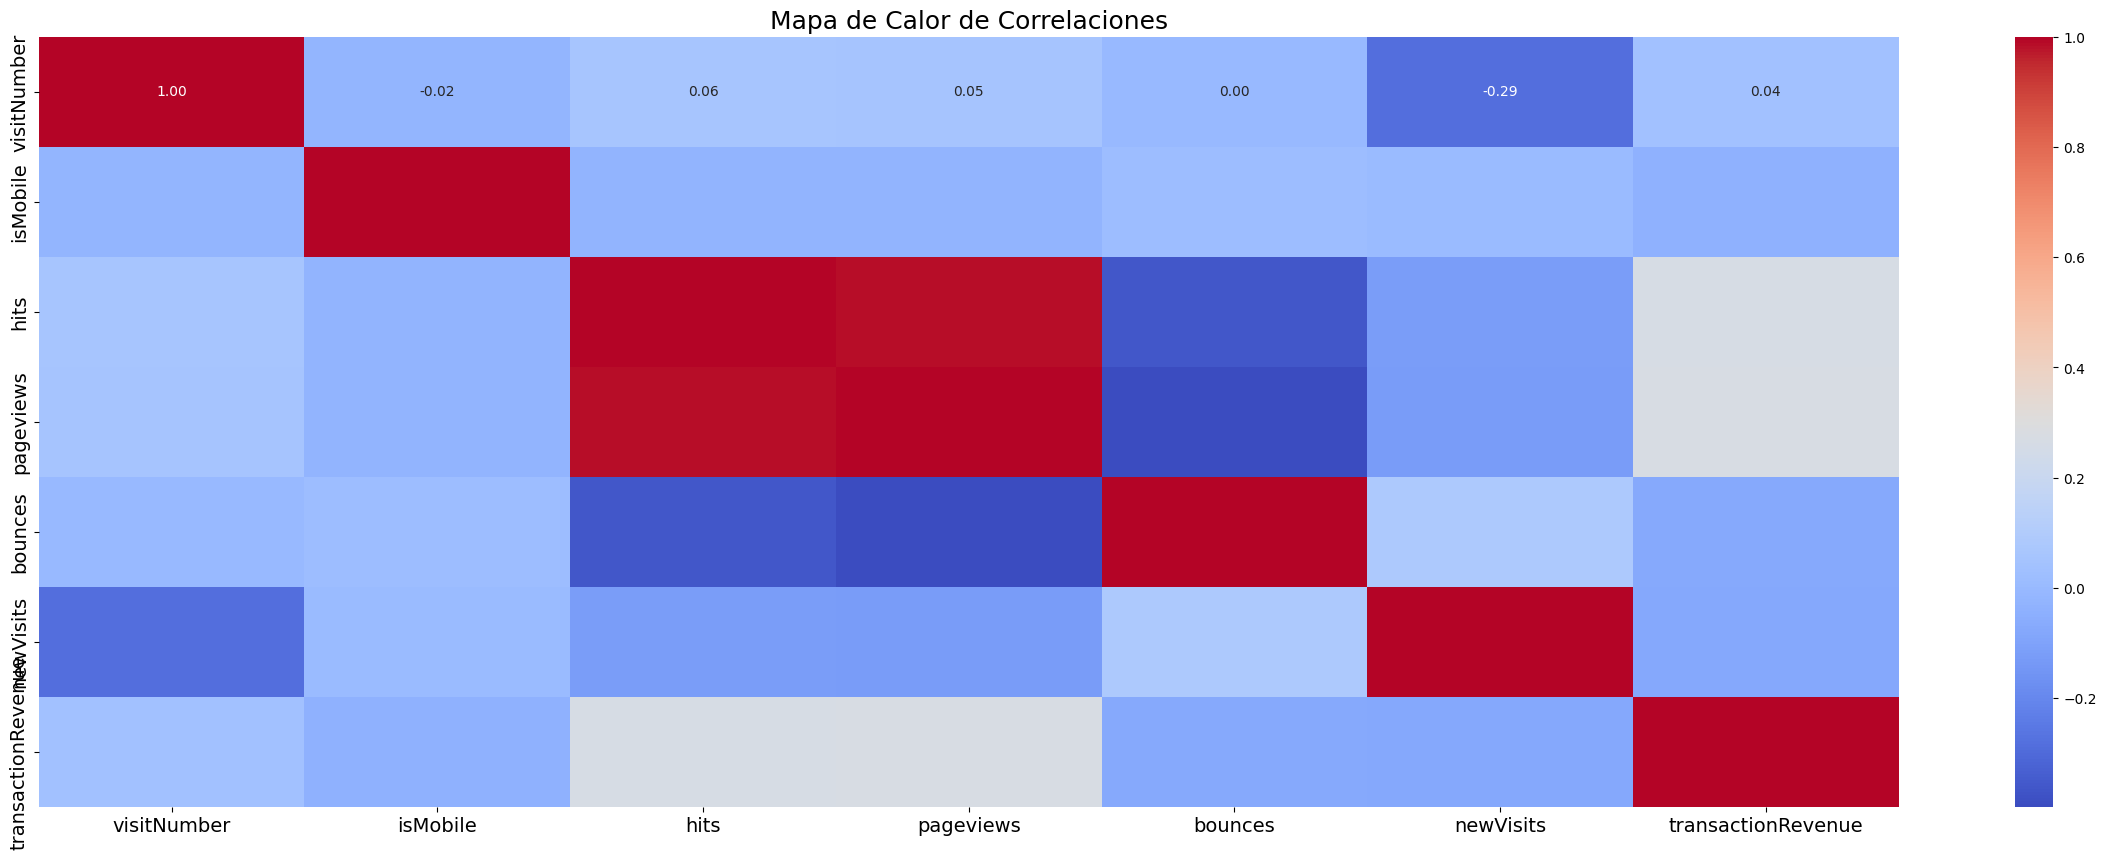

In [76]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

## **Preparacion de los datos para llevarlos al modelo**

1- Borrado de columnas que no nos aportan informacion al modelo, o vemos columnas con practicamente la misma informacion:
  
  Se elimina "date" porque "VisitStartTime" nos aporta los mismos datos y es mas fiable ya que las ultimas filas no coinciden.
  
  Se elimina "sessionId" i "visitId" porque "fullVisitorId" tiene una informacion similar
  
  Se elimina "isMobile" porque porque "device" aporta la misma informacion
  
  Se elimina "networkDomain", referralPath, porque no aportan valor y estan incompletas

  Se elimina "continent", "region" y "metro" porque "subContinent" y "city" esplican esas variables

  Se elimina "referralPath" porque tiene muchos valores incompletos y no nos aporta valor al modelo.

  se elimina "hits" altamente correlacionada con "paginasWiews"




In [77]:
# Borrado de columnas
delete_columns = ["date", "sessionId", "visitId", "isMobile", "networkDomain", "continent", "metro", "region", "referralPath", "hits" ]
df_traffic.drop(delete_columns, axis = 1, inplace = True )

In [78]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   fullVisitorId       12283 non-null  object        
 2   visitNumber         12283 non-null  int64         
 3   visitStartTime      12283 non-null  datetime64[ns]
 4   browser             12283 non-null  object        
 5   operatingSystem     12283 non-null  object        
 6   deviceCategory      12283 non-null  object        
 7   subContinent        12283 non-null  object        
 8   country             12283 non-null  object        
 9   city                12283 non-null  object        
 10  campaign            12283 non-null  object        
 11  source              12283 non-null  object        
 12  medium              12283 non-null  object        
 13  pageviews           12283 non-null  int64     

In [79]:
"""df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
preprocesamiento()
df_traffic.sample(5)"""

"df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})\npreprocesamiento()\ndf_traffic.sample(5)"

#**3. Exploración y Feature Engineering**


---


## **3.1- creacion de nuevas variables de las columnas de tipo fecha**


In [80]:
# Creacion de las varibles para la columna date
df_traffic['year'] = df_traffic['visitStartTime'].apply(lambda x:x.year)
df_traffic['month'] = df_traffic['visitStartTime'].apply(lambda x:x.month)
df_traffic['quarterMonth'] = df_traffic['visitStartTime'].apply(lambda x:x.month)
df_traffic['day'] = df_traffic['visitStartTime'].apply(lambda x:x.day)
df_traffic['weekday'] = df_traffic['visitStartTime'].apply(lambda x:x.weekday)


In [81]:
# Creacion de las variables para la columna visitStartTime
df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['madrugada', 'mañana', 'tarde', 'noche'], ordered=False).astype('object')


In [82]:
df_traffic.head()

,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,medium,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
0,Organic Search,9674781571160116268,1,2016-09-02 08:23:27,Chrome,Windows,desktop,Southeast Asia,Singapore,Singapore,(not set),google,organic,1,1,1,0.0,2016,9,9,2,<bound method Timestamp.weekday of Timestamp('...,mañana
1,Organic Search,8590648239310839049,1,2016-09-02 17:05:28,Chrome,Macintosh,desktop,Eastern Europe,Poland,not available in demo dataset,(not set),google,organic,1,1,1,0.0,2016,9,9,2,<bound method Timestamp.weekday of Timestamp('...,tarde
2,Affiliates,9772828344252850532,1,2016-09-02 22:53:22,Chrome,Macintosh,desktop,South America,Argentina,Buenos Aires,Data Share Promo,Partners,affiliate,1,1,1,0.0,2016,9,9,2,<bound method Timestamp.weekday of Timestamp('...,noche
3,Organic Search,1350700416054916432,2,2016-09-03 05:14:09,Safari,iOS,mobile,Northern America,United States,not available in demo dataset,(not set),google,organic,1,1,0,0.0,2016,9,9,3,<bound method Timestamp.weekday of Timestamp('...,madrugada
4,Organic Search,1350700416054916432,1,2016-09-02 15:21:11,Safari,iOS,mobile,Northern America,United States,not available in demo dataset,(not set),google,organic,4,0,1,0.0,2016,9,9,2,<bound method Timestamp.weekday of Timestamp('...,tarde


In [83]:
#  ponemos los indices la columna "visitStartTime" Porque se trata de una serie temporal
df_traffic.set_index("visitStartTime", inplace = True)

In [84]:
# Aplica un label encoder a las variables de tipo object
cualitativas = df_traffic.dtypes[df_traffic.dtypes == object].keys()
for columna in cualitativas:
    lbl = LabelEncoder()
    strings = list(df_traffic[columna].values.astype('str'))
    lbl.fit(strings)
    df_traffic[columna] = lbl.transform(strings)

In [85]:
df_traffic.head()

,channelGrouping,fullVisitorId,visitNumber,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,medium,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
visitStartTime,,,,,,,,,,,,,,,,,,,,,,
2016-09-02 08:23:27,4,9639,1,5,9,0,15,114,250,0,23,5,1,1,1,0.0,2016,9,9,2,1001,1
2016-09-02 17:05:28,4,8480,1,5,6,0,7,102,295,0,23,5,1,1,1,0.0,2016,9,9,2,1019,4
2016-09-02 22:53:22,1,9752,1,5,6,0,14,3,43,4,3,2,1,1,1,0.0,2016,9,9,2,1025,3
2016-09-03 05:14:09,4,571,2,18,11,1,11,138,295,0,23,5,1,1,0,0.0,2016,9,9,3,1032,0
2016-09-02 15:21:11,4,571,1,18,11,1,11,138,295,0,23,5,4,0,1,0.0,2016,9,9,2,1014,4


In [86]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12283 entries, 2016-09-02 08:23:27 to 2017-01-05 05:22:17
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int32  
 1   fullVisitorId       12283 non-null  int32  
 2   visitNumber         12283 non-null  int64  
 3   browser             12283 non-null  int32  
 4   operatingSystem     12283 non-null  int32  
 5   deviceCategory      12283 non-null  int32  
 6   subContinent        12283 non-null  int32  
 7   country             12283 non-null  int32  
 8   city                12283 non-null  int32  
 9   campaign            12283 non-null  int32  
 10  source              12283 non-null  int32  
 11  medium              12283 non-null  int32  
 12  pageviews           12283 non-null  int64  
 13  bounces             12283 non-null  int64  
 14  newVisits           12283 non-null  int64  
 15  transactionRevenue

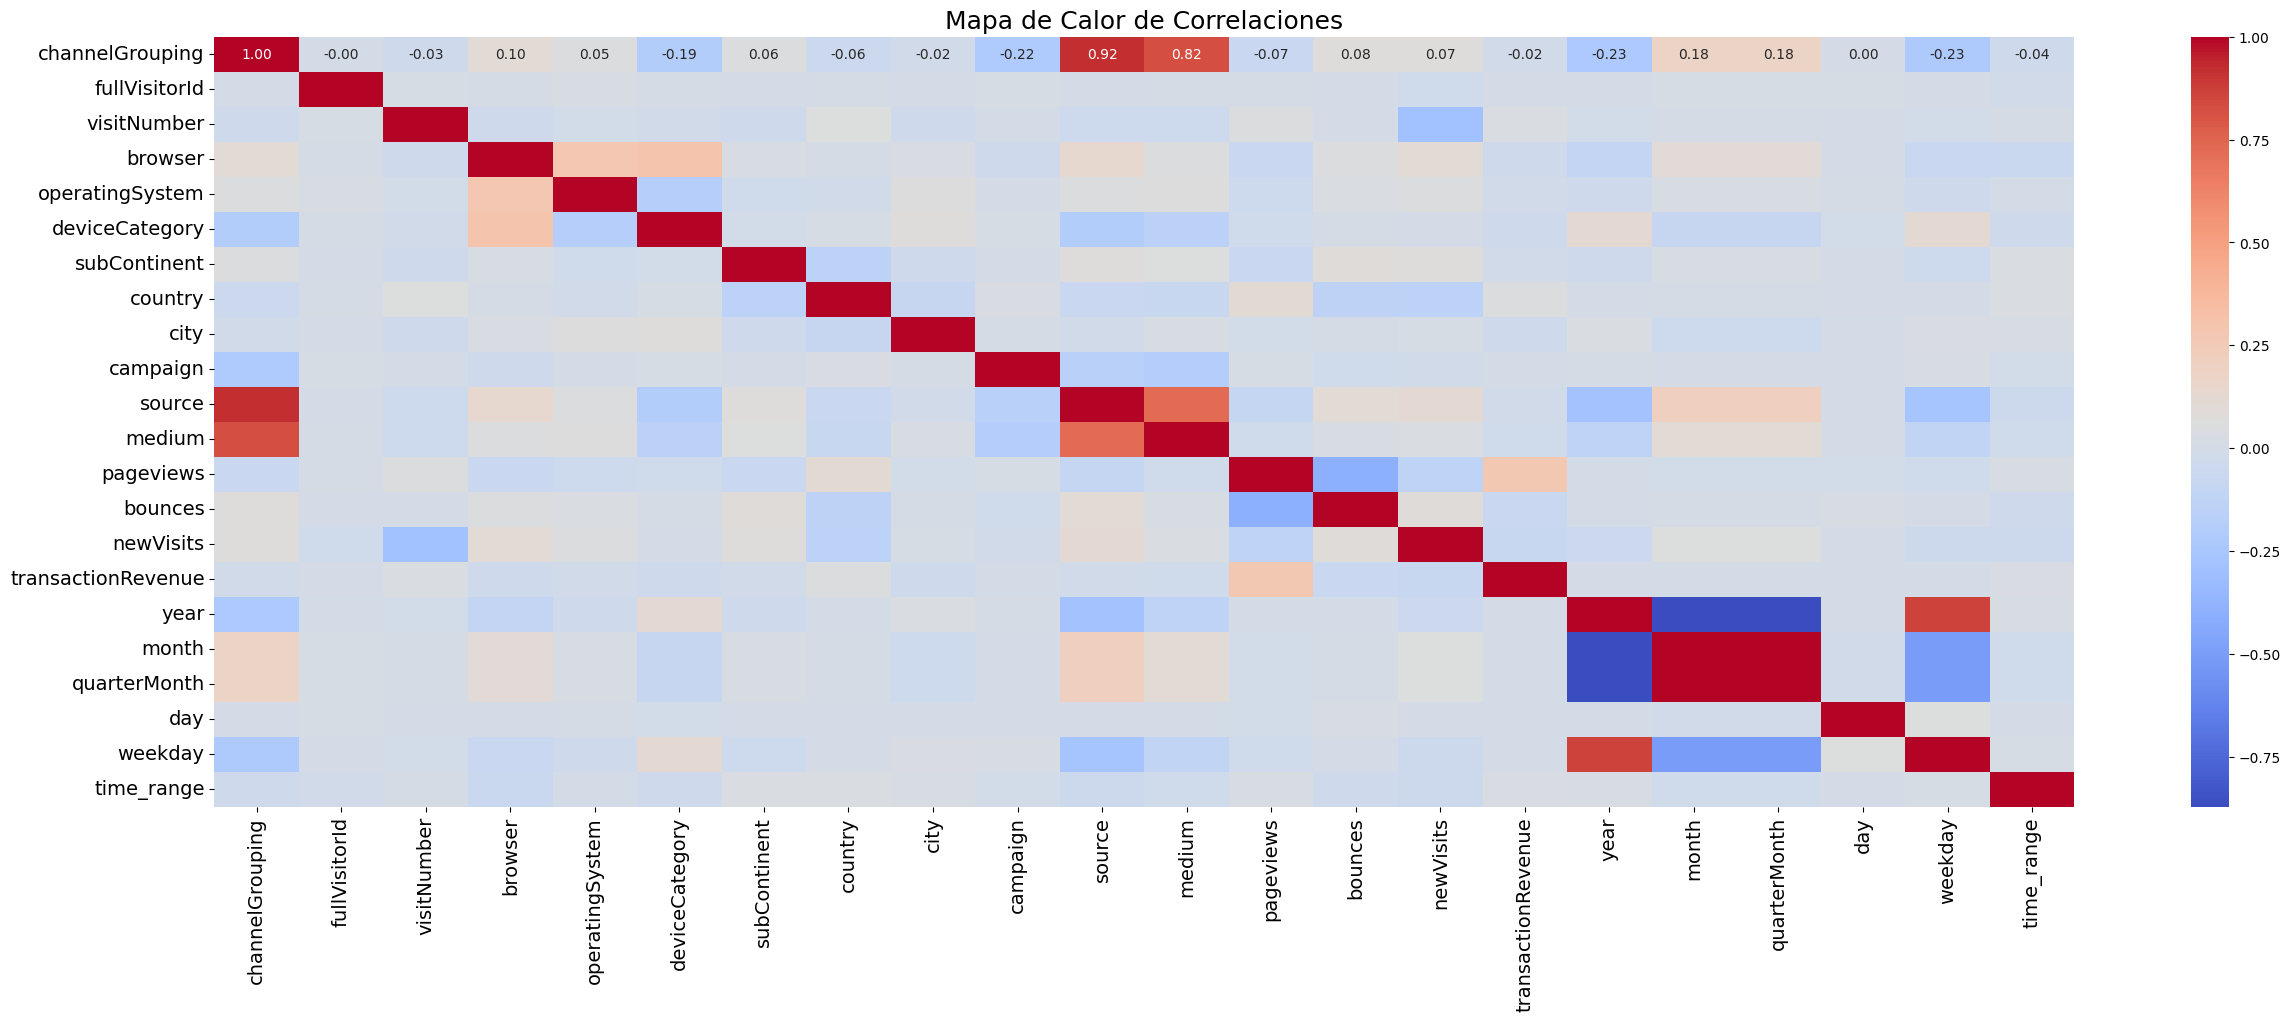

In [87]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

### Borrado de columnas altamente correlacionadas que serian "chanelGrouping" y "medium" con "source"

In [88]:
delete_columns1 = ["channelGrouping", "medium"]
df_traffic.drop(delete_columns1, axis = 1,  inplace = True)

In [89]:
df_traffic.head()

,fullVisitorId,visitNumber,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
visitStartTime,,,,,,,,,,,,,,,,,,,,
2016-09-02 08:23:27,9639,1,5,9,0,15,114,250,0,23,1,1,1,0.0,2016,9,9,2,1001,1
2016-09-02 17:05:28,8480,1,5,6,0,7,102,295,0,23,1,1,1,0.0,2016,9,9,2,1019,4
2016-09-02 22:53:22,9752,1,5,6,0,14,3,43,4,3,1,1,1,0.0,2016,9,9,2,1025,3
2016-09-03 05:14:09,571,2,18,11,1,11,138,295,0,23,1,1,0,0.0,2016,9,9,3,1032,0
2016-09-02 15:21:11,571,1,18,11,1,11,138,295,0,23,4,0,1,0.0,2016,9,9,2,1014,4


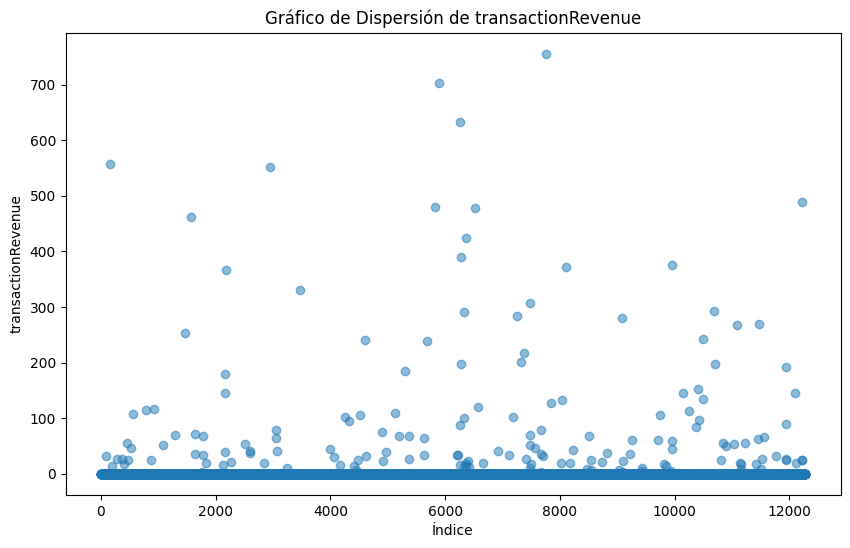

In [90]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: >

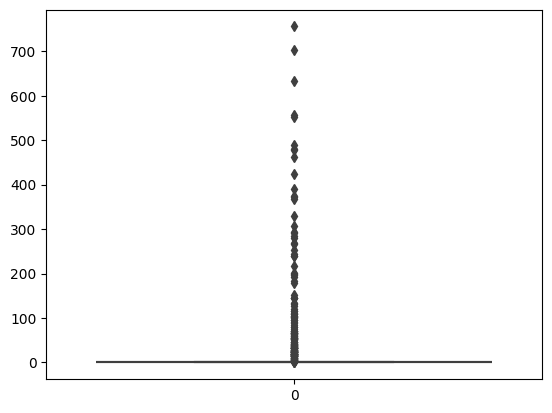

In [91]:
sns.boxplot(df_traffic.transactionRevenue)

In [92]:
df_traffic.describe()

,fullVisitorId,visitNumber,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,5033.709192,1.923390,8.111211,6.888627,0.301799,12.389888,103.081576,229.698608,0.127656,33.421558,3.871286,0.502483,0.768949,1.447871,2016.527558,6.900757,6.900757,15.705039,6139.423512,2.250997
std,2878.429848,5.878228,5.366946,3.091500,0.526317,4.400780,44.777785,92.453383,0.659000,26.659971,7.273662,0.500014,0.421522,20.893896,0.499260,3.498831,3.498831,8.793152,3545.220924,1.568321
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2554.500000,1.000000,5.000000,6.000000,0.000000,11.000000,60.000000,172.000000,0.000000,23.000000,1.000000,0.000000,1.000000,0.000000,2016.000000,4.000000,4.000000,8.000000,3069.500000,1.000000
50%,5032.000000,1.000000,5.000000,6.000000,0.000000,11.000000,132.000000,295.000000,0.000000,23.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,7.000000,7.000000,16.000000,6140.000000,3.000000
75%,7522.500000,1.000000,8.000000,9.000000,1.000000,15.000000,138.000000,295.000000,0.000000,60.000000,4.000000,1.000000,1.000000,0.000000,2017.000000,10.000000,10.000000,23.000000,9209.500000,4.000000
max,9996.000000,195.000000,21.000000,11.000000,2.000000,21.000000,144.000000,295.000000,6.000000,75.000000,305.000000,1.000000,1.000000,755.630000,2017.000000,12.000000,12.000000,31.000000,12278.000000,4.000000


In [93]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

transactionRevenue
0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: count, Length: 147, dtype: int64

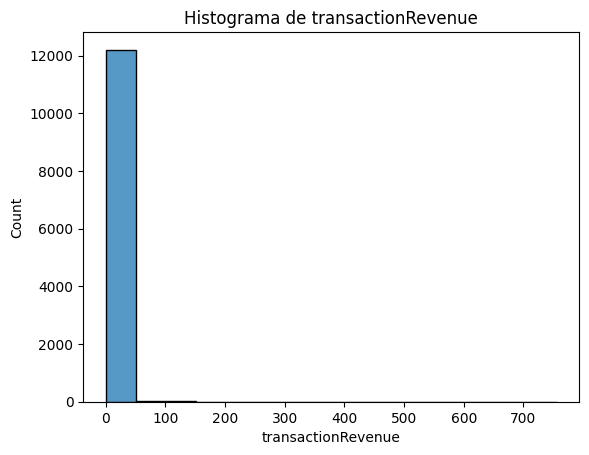

In [94]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=False)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue');

In [95]:
# como quedan los datos ya limpios
df_traffic.sample(5)

,fullVisitorId,visitNumber,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
visitStartTime,,,,,,,,,,,,,,,,,,,,
2017-03-13 02:21:26,7574,1,5,9,0,11,19,295,4,3,1,1,1,0.0,2017,3,3,13,7954,0
2017-06-21 05:04:36,8176,1,18,11,1,11,138,295,0,23,1,1,1,0.0,2017,6,6,21,11039,0
2016-12-11 05:29:34,7389,2,5,3,0,11,138,295,0,48,9,0,0,0.0,2016,12,12,11,5163,0
2016-08-27 14:50:33,892,1,5,3,0,17,55,25,0,62,4,0,1,0.0,2016,8,8,27,836,4
2016-11-30 11:43:48,5992,2,5,9,0,12,137,147,0,4,7,0,0,0.0,2016,11,11,30,4711,1


In [96]:
df_traffic

,fullVisitorId,visitNumber,browser,operatingSystem,deviceCategory,subContinent,country,city,campaign,source,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
visitStartTime,,,,,,,,,,,,,,,,,,,,
2016-09-02 08:23:27,9639,1,5,9,0,15,114,250,0,23,1,1,1,0.0,2016,9,9,2,1001,1
2016-09-02 17:05:28,8480,1,5,6,0,7,102,295,0,23,1,1,1,0.0,2016,9,9,2,1019,4
2016-09-02 22:53:22,9752,1,5,6,0,14,3,43,4,3,1,1,1,0.0,2016,9,9,2,1025,3
2016-09-03 05:14:09,571,2,18,11,1,11,138,295,0,23,1,1,0,0.0,2016,9,9,3,1032,0
2016-09-02 15:21:11,571,1,18,11,1,11,138,295,0,23,4,0,1,0.0,2016,9,9,2,1014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-04 14:36:48,7116,1,5,9,0,7,102,295,0,75,1,1,1,0.0,2017,1,1,4,5889,4
2017-01-05 01:40:07,6718,1,5,1,1,21,43,295,0,75,1,1,1,0.0,2017,1,1,5,5910,0
2017-01-05 04:55:22,5048,1,5,5,0,17,55,295,0,75,1,1,1,0.0,2017,1,1,5,5913,0


In [97]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12283 entries, 2016-09-02 08:23:27 to 2017-01-05 05:22:17
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fullVisitorId       12283 non-null  int32  
 1   visitNumber         12283 non-null  int64  
 2   browser             12283 non-null  int32  
 3   operatingSystem     12283 non-null  int32  
 4   deviceCategory      12283 non-null  int32  
 5   subContinent        12283 non-null  int32  
 6   country             12283 non-null  int32  
 7   city                12283 non-null  int32  
 8   campaign            12283 non-null  int32  
 9   source              12283 non-null  int32  
 10  pageviews           12283 non-null  int64  
 11  bounces             12283 non-null  int64  
 12  newVisits           12283 non-null  int64  
 13  transactionRevenue  12283 non-null  float64
 14  year                12283 non-null  int64  
 15  month             

In [98]:
df_traffic.to_csv("df_marcos.csv", index = False, sep=';')